In [ ]:
!pip install datasets torch==2.3.0 torchtext==0.18.0 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from datasets import load_dataset

train_iter = load_dataset("sh0416/ag_news", split='train')

from sklearn.model_selection import StratifiedShuffleSplit

labels = [s['label'] - 1 for s in train_iter]

sss = StratifiedShuffleSplit(n_splits=1, train_size=0.95, random_state=42)
trix, valix = next(sss.split(labels, labels))

abc = set()
for t in train_iter:
  abc |= set(list(t['title']))
  abc |= set(list(t['description']))

abc = list(abc)

import numpy as np

def lzw(s: str, abc: list, d: dict = None, ret_dict: bool = False):
    d = d or {x: i for i, x in enumerate(abc)}
    k = len(d)
    x = s[0]
    ret = ""
    code_len = int(np.ceil(np.log2(k)))
    for i in range(1, len(s)):
        y = s[i]
        if x + y in d:
            x = x + y
            continue
        ret += bin(d[x])[2:].rjust(code_len, '0')
        d[x + y] = k
        k += 1
        code_len = int(np.ceil(np.log2(k)))
        x = y
    ret += bin(d[x])[2:].rjust(code_len, '0')

    if ret_dict:
        return ret, d
    return ret

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

train.jsonl:   0%|          | 0.00/33.7M [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/2.13M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
def count_characters_numpy(s, alphabet):
    alphabet = ''.join(alphabet)
    # Convert string and alphabet to numpy arrays of bytes
    s_array = np.frombuffer(s.encode(), dtype='S1')
    alphabet_array = np.frombuffer(alphabet.encode(), dtype='S1')

    # Initialize result array
    counts = np.zeros(len(alphabet), dtype=int)

    # Use broadcasting and comparison
    for i, char in enumerate(alphabet_array):
        counts[i] = np.sum(s_array == char)

    return counts

# Example usage
alphabet = 'abcde'
s = 'abacabad'
result = count_characters_numpy(s, alphabet)
print(result)  # Output: [4 2 1 1 0]

[4 2 1 1 0]


In [ ]:
from scipy.special import xlogy

def entropy(prob: np.ndarray, base: float = np.e):
    return xlogy(-prob, prob).sum(axis=-1) / np.log(base)

def complexity_bound(s: np.ndarray, abc: list):
    l = len(abc)
    prob = s / s.sum()
    return (2 * l * np.log(len(s)) / np.log(l) + len(s) * entropy(prob, l)) * np.log2(l)

In [ ]:
def kcd(s: np.ndarray, t: np.ndarray, cs, ct, abc: list):
    st = complexity_bound(s + t, abc)
    return max(max(st - cs, st - ct), 0)

In [ ]:
def kc(freq, abc):
  return complexity_bound(freq, abc)

In [ ]:
import torch
from itertools import combinations, cycle


class TextDatasetCorr(torch.utils.data.Dataset):
  def __init__(self, data_iter, index, Ncorr, Kcorr=2):
    super().__init__()

    p = np.random.permutation(len(index))
    self.labels = (np.array(data_iter[index]['label']) - 1)[p]
    self.texts = (np.array(data_iter[index]['title']) + ' ' + np.array(data_iter[index]['description']))[p]

    pools = tuple(cycle(self.texts[self.labels == l]) for l in range(self.labels.max() + 1))
    combs = combinations(range(len(pools)), Kcorr)
    res = []
    resy = []

    for ix in combs:
      for _ in range(Ncorr):
        sample_text = ' '.join([next(pools[i]) for i in ix])
        for i in ix:
          res.append(sample_text)
          resy.append(i)

    self.texts, self.labels = np.array(res), np.array(resy)
    self.frequencies = []
    for t in res:
      self.frequencies.append(count_characters_numpy(t, abc))
    self.frequencies = np.array(self.frequencies)
    # self.complexities = np.array([len(lzw(str(t), abc)) for t in self.texts])
    self.complexities = np.array([kc(f, abc) for f in self.frequencies])


  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    return self.texts[idx], self.labels[idx], self.complexities[idx], self.frequencies[idx]


class TextDataset(torch.utils.data.Dataset):
  def __init__(self, data_iter, index):
    super().__init__()
    self.labels = (np.array(data_iter[index]['label']) - 1)
    self.texts = (np.array(data_iter[index]['title']) + ' ' + np.array(data_iter[index]['description']))
    # self.complexities = np.array([len(lzw(str(t), abc)) for t in self.texts])
    self.frequencies = []
    for t in self.texts:
      self.frequencies.append(count_characters_numpy(t, abc))
    self.frequencies = np.array(self.frequencies)
    self.complexities = np.array([kc(f, abc) for f in self.frequencies])

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    return self.texts[idx], self.labels[idx], self.complexities[idx], self.frequencies[idx]

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, train_size=0.05, random_state=42)
noncorr_trix, _ = next(sss.split(labels, labels))
train_dataset3 = TextDatasetCorr(train_iter, trix, 8000, 3)
train_dataset4 = TextDatasetCorr(train_iter, trix, 8000, 4)
train_dataset0 = TextDataset(train_iter, noncorr_trix)
train_dataset0.labels = np.concat([train_dataset0.labels, train_dataset3.labels, train_dataset4.labels])
train_dataset0.texts = np.concat([train_dataset0.texts, train_dataset3.texts, train_dataset4.texts])
train_dataset0.complexities = np.concat([train_dataset0.complexities, train_dataset3.complexities, train_dataset4.complexities])
train_dataset0.frequencies = np.concat([train_dataset0.frequencies, train_dataset3.frequencies, train_dataset4.frequencies])
val_dataset = TextDataset(train_iter, valix)
train_dataset1 = TextDataset(train_iter, trix)

In [ ]:
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import vocab

tokenizer = get_tokenizer('basic_english')
counter = Counter()
for t in train_dataset0.texts:
    counter.update(tokenizer(t))
for t in val_dataset.texts:
    counter.update(tokenizer(t))
vocab = vocab(counter, min_freq=1)

text_pipeline = lambda x: [vocab[token] for token in tokenizer(x)]
text_pipeline('here is an example')

/usr/local/lib/python3.11/dist-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.11/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated

[786, 255, 53, 13392]

In [ ]:
from torch.utils.data import DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):
    label_list, text_list, offsets, c = [], [], [0], []
    for t in batch:
        _label, _text = int(t[1]), str(t[0])
        c.append(t[2])
        label_list.append(_label)
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)

    return label_list.to(device), text_list.to(device), offsets.to(device), torch.tensor(c).to(device)

In [ ]:
import torch.nn.functional as F

def train(dataloader, losses: list):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets, c) in enumerate(dataloader):
        optimizer.zero_grad()
        predited_label = model(text, offsets)

        weight = (c.max() - c)/(c.max() - c.min())
        weight /= weight.sum()
        loss = (F.cross_entropy(predited_label, label, reduction='none') * weight).sum()
        losses.append(loss.item())

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predited_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()


def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets, c) in enumerate(dataloader):
            predited_label = model(text, offsets)
            total_acc += (predited_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count

In [ ]:
num_class = 4
vocab_size = len(vocab)
emsize = 64

In [ ]:
from torch import nn

class TextClassificationModel(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=False)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

In [ ]:
model = TextClassificationModel(vocab_size, emsize, num_class).to(device)

In [ ]:
# Training on corrupted dataset with weights

import time

# Hyperparameters
EPOCHS = 5 # epoch
LR = 5  # learning rate
BATCH_SIZE = 64 # batch size for training

optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None

train_dataloader = DataLoader(train_dataset0, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)

losses = []

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader, losses)
    accu_val = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

| epoch   1 |   500/ 2094 batches | accuracy    0.265
| epoch   1 |  1000/ 2094 batches | accuracy    0.283
| epoch   1 |  1500/ 2094 batches | accuracy    0.294
| epoch   1 |  2000/ 2094 batches | accuracy    0.307
-----------------------------------------------------------
| end of epoch   1 | time: 79.67s | valid accuracy    0.760 
-----------------------------------------------------------
| epoch   2 |   500/ 2094 batches | accuracy    0.313
| epoch   2 |  1000/ 2094 batches | accuracy    0.320
| epoch   2 |  1500/ 2094 batches | accuracy    0.318
| epoch   2 |  2000/ 2094 batches | accuracy    0.318
-----------------------------------------------------------
| end of epoch   2 | time: 80.36s | valid accuracy    0.813 
-----------------------------------------------------------
| epoch   3 |   500/ 2094 batches | accuracy    0.329
| epoch   3 |  1000/ 2094 batches | accuracy    0.326
| epoch   3 |  1500/ 2094 batches | accuracy    0.320
| epoch   3 |  2000/ 2094 batches | accuracy

In [ ]:
len(losses)

10470

<Axes: >

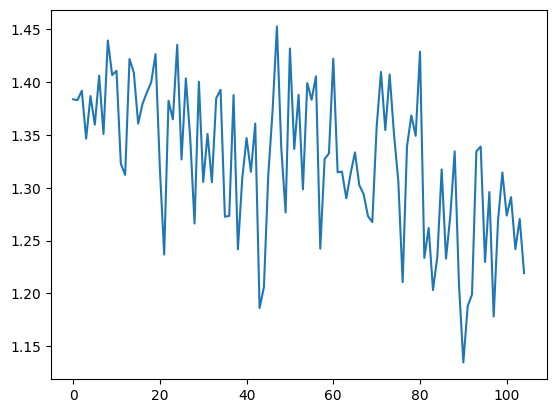

In [ ]:
import pandas as pd

pd.Series(losses[::100]).plot()

In [ ]:
pred = []
for i in range(len(train_dataset0)):
  processed_text = torch.tensor(text_pipeline(train_dataset0.texts[i]), dtype=torch.int64).to(device)
  offsets = torch.tensor([0]).to(device)
  pred.append(model(processed_text, offsets).reshape(-1).argmax().item())

In [ ]:
train_dataset0.pred = np.array(pred)

In [ ]:
train_dataset0.complexities.min(), train_dataset0.complexities.max()

(np.float64(1356.56360342249), np.float64(1475.9538587665702))

<Axes: >

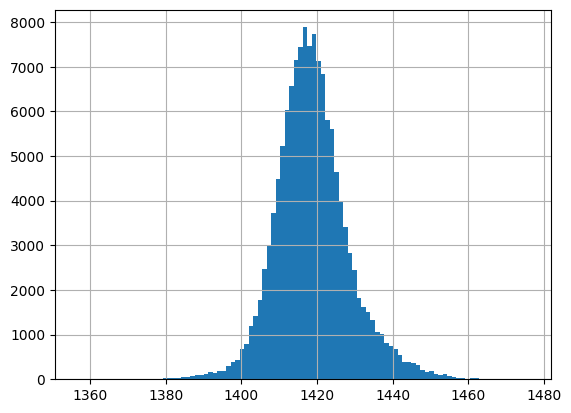

In [ ]:
pd.Series(train_dataset0.complexities).hist(bins=100)

<Axes: >

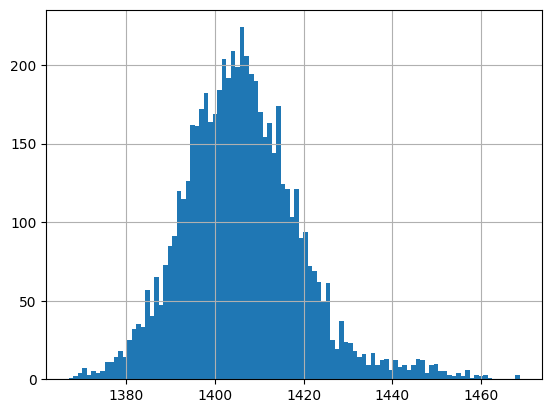

In [ ]:
pd.Series(val_dataset.complexities).hist(bins=100)

In [ ]:
Q = np.quantile(train_dataset0.complexities, np.arange(0.05, 1, 0.05))

<Axes: >

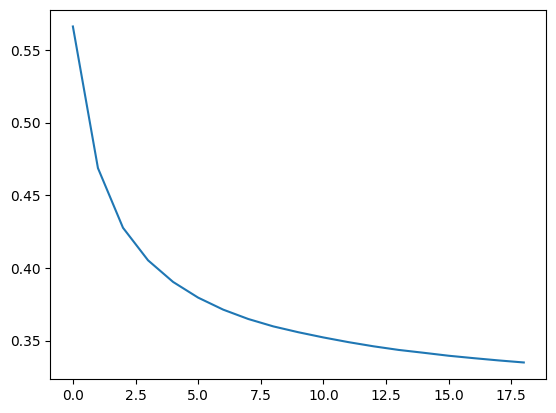

In [ ]:
acc = []
for q in Q:
  ix = train_dataset0.complexities <= q
  labels, preds = train_dataset0.labels[ix], train_dataset0.pred[ix]
  acc.append(np.sum(labels == preds) / ix.sum())
pd.Series(acc).plot()

In [ ]:
def train(dataloader, losses: list):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets, c) in enumerate(dataloader):
        optimizer.zero_grad()
        predited_label = model(text, offsets)
        loss = F.cross_entropy(predited_label, label)
        losses.append(loss.item())

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predited_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()

In [ ]:
model = TextClassificationModel(vocab_size, emsize, num_class).to(device)

In [ ]:
# Training on corrupted dataset with weights

import time

# Hyperparameters
EPOCHS = 5 # epoch
LR = 5  # learning rate
BATCH_SIZE = 64 # batch size for training

optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None

train_dataloader = DataLoader(train_dataset0, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)

losses = []

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader, losses)
    accu_val = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

| epoch   1 |   500/ 2094 batches | accuracy    0.260
| epoch   1 |  1000/ 2094 batches | accuracy    0.275
| epoch   1 |  1500/ 2094 batches | accuracy    0.293
| epoch   1 |  2000/ 2094 batches | accuracy    0.300
-----------------------------------------------------------
| end of epoch   1 | time: 91.12s | valid accuracy    0.757 
-----------------------------------------------------------
| epoch   2 |   500/ 2094 batches | accuracy    0.316
| epoch   2 |  1000/ 2094 batches | accuracy    0.315
| epoch   2 |  1500/ 2094 batches | accuracy    0.315
| epoch   2 |  2000/ 2094 batches | accuracy    0.319
-----------------------------------------------------------
| end of epoch   2 | time: 83.09s | valid accuracy    0.800 
-----------------------------------------------------------
| epoch   3 |   500/ 2094 batches | accuracy    0.324
| epoch   3 |  1000/ 2094 batches | accuracy    0.326
| epoch   3 |  1500/ 2094 batches | accuracy    0.320
| epoch   3 |  2000/ 2094 batches | accuracy

<Axes: >

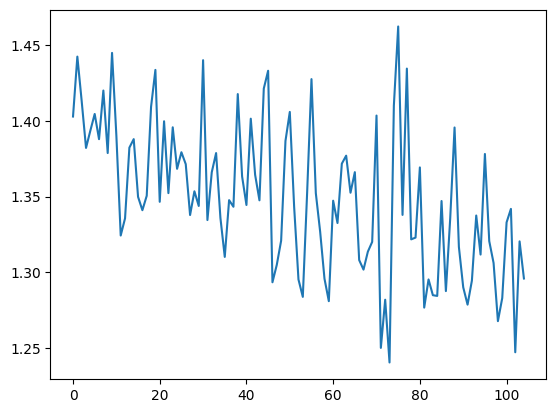

In [ ]:
pd.Series(losses[::100]).plot()

In [ ]:
pred = []
for i in range(len(train_dataset0)):
  processed_text = torch.tensor(text_pipeline(train_dataset0.texts[i]), dtype=torch.int64).to(device)
  offsets = torch.tensor([0]).to(device)
  pred.append(model(processed_text, offsets).reshape(-1).argmax().item())

<Axes: >

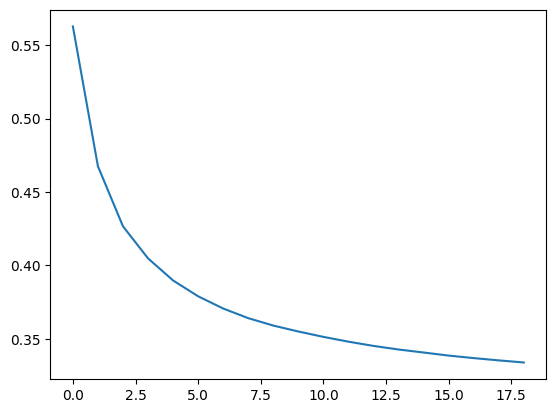

In [ ]:
train_dataset0.pred1 = np.array(pred)
acc = []
for q in Q:
  ix = train_dataset0.complexities <= q
  labels, preds = train_dataset0.labels[ix], train_dataset0.pred1[ix]
  acc.append(np.sum(labels == preds) / ix.sum())
pd.Series(acc).plot()

In [ ]:
import copy
model_copy = copy.deepcopy(model)

In [ ]:
Q = np.quantile(val_dataset.complexities, np.arange(0.05, 1, 0.05))

In [ ]:
pred = []
for i in range(len(val_dataset)):
  processed_text = torch.tensor(text_pipeline(val_dataset.texts[i]), dtype=torch.int64).to(device)
  offsets = torch.tensor([0]).to(device)
  pred.append(model(processed_text, offsets).reshape(-1).argmax().item())

<Axes: >

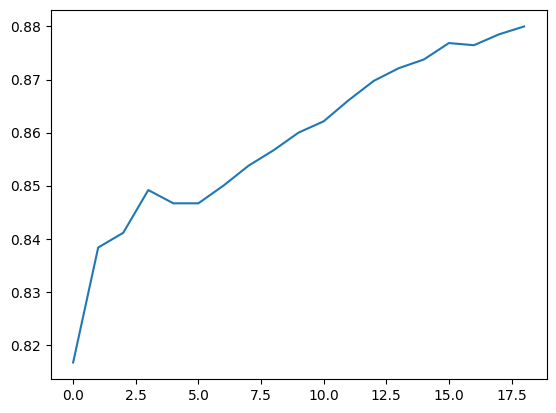

In [ ]:
val_dataset.pred1 = np.array(pred)
acc = []
for q in Q:
  ix = val_dataset.complexities <= q
  labels, preds = val_dataset.labels[ix], val_dataset.pred1[ix]
  acc.append(np.sum(labels == preds) / ix.sum())
pd.Series(acc).plot()

In [ ]:
pred = []
for i in range(len(val_dataset)):
  processed_text = torch.tensor(text_pipeline(val_dataset.texts[i]), dtype=torch.int64).to(device)
  offsets = torch.tensor([0]).to(device)
  pred.append(model(processed_text, offsets).reshape(-1).argmax().item())

<Axes: >

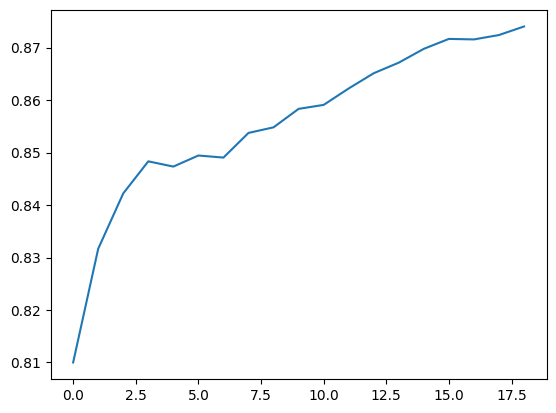

In [ ]:
val_dataset.pred = np.array(pred)
acc = []
for q in Q:
  ix = val_dataset.complexities <= q
  labels, preds = val_dataset.labels[ix], val_dataset.pred[ix]
  acc.append(np.sum(labels == preds) / ix.sum())
pd.Series(acc).plot()